In [1]:
import pandas as pd

df = pd.read_excel('../data/BoulderChargesWithBookingDays.xlsx')

In [2]:
df.head()

,Booking Number,Subject Name,Days in Facility,Address,Booking Date,Charge,Charge Literal
0,1000025,"KINION,GREGORY LEE",6,HOMELESS,2010-01-01,17-2-103,PAROLE VIOLATION
1,1000027,"SHEPHERD,JAMES TONY",4,TRANSIENT,2010-01-01,BOULDER MUNI - FTA,CAMP/LODGE W OUT CON
2,1000032,"HEINRICH,ROBERT MATTHEW",6,TRANSIENT,2010-01-02,BOULDER MUNI,"POSN,CONS,ILL CAMPIN"
3,1000065,"DOBSON,JAMES CRAIG",43,TRANSIENT,2010-01-03,BOULDER MUNI,3RD DEG ASSLT
4,1000069,"QYDIR,MUHAMMAD",2,TRANSIENT,2010-01-03,BOULDER MUNI,THREAT BODILY INJUR


In [10]:
df['year'] = df['Booking Date'].apply(lambda x: x.year)

In [77]:
df['camping'] = df['Charge Literal'].str.contains('CAMP') | df['Charge Literal'].str.contains('CMP') | df['Charge Literal'].str.contains('LODG')
df['smoking'] = df['Charge Literal'].str.contains('SMOK')
df['trespass'] = df['Charge Literal'].str.contains('TRESP') | df['Charge Literal'].str.contains('TRSP')


df['fta'] = df['Charge Literal'].str.contains('FTA')
df['ftp'] = df['Charge Literal'].str.contains('FTP')

In [88]:
print('''There are:

{} rows in the data.
{} unique people's names.
{} camping bookings ({} of those fta)
{} smoking bookings ({} of those fta)
{} trespass bookings ({} of those fta)


Camping by year:
{}

FTP by year:
{}

Average stay for:
Camping: {} (fta: {}),
Smoking: {} (fta: {}),
Trespass: {} (fta: {})
'''.format(
        df.shape[0],
        df['Subject Name'].nunique(),
        df.camping.sum(), df[df.camping & df.fta].shape[0],
        df.smoking.sum(), df[df.smoking & df.fta].shape[0],
        df.trespass.sum(), df[df.trespass & df.fta].shape[0],
        df.groupby(['year', 'camping']).agg({'Days in Facility': ['mean', 'sum', 'count']}),
        df.groupby(['year', 'ftp']).agg({'Days in Facility': ['mean', 'sum', 'count']}),
        
        df[df.camping & ~df.fta]['Days in Facility'].mean(), df[df.camping & df.fta]['Days in Facility'].mean(),
        df[df.smoking & ~df.fta]['Days in Facility'].mean(), df[df.smoking & df.fta]['Days in Facility'].mean(),
        df[df.trespass & ~df.fta]['Days in Facility'].mean(), df[df.trespass & df.fta]['Days in Facility'].mean()
    ))

There are:

10919 rows in the data.
5299 unique people's names.
624 camping bookings (416 of those fta)
195 smoking bookings (160 of those fta)
1506 trespass bookings (497 of those fta)


Camping by year:
             Days in Facility             
                         mean    sum count
year camping                              
2010 False          27.868868  29541  1060
     True            5.855263    445    76
2011 False          29.741232  31377  1055
     True            4.095890    299    73
2012 False          30.498382  37696  1236
     True            3.806452    472   124
2013 False          35.231980  42525  1207
     True            4.075269    379    93
2014 False          35.623408  44743  1256
     True            5.707692    371    65
2015 False          37.391304  47300  1265
     True            6.333333    418    66
2016 False          33.362924  51112  1532
     True            4.118644    243    59
2017 False          22.783526  33469  1469
     True            

In [72]:
camping_by_year = df.groupby(['year', 'camping']).agg({'Days in Facility': ['mean', 'sum', 'count']}).reset_index()
camping_by_year = camping_by_year[camping_by_year.camping].drop('camping', axis=1)
camping_by_year.reset_index(drop=True, inplace=True)
camping_by_year.columns = ['year'] + list(camping_by_year.columns.get_level_values(1)[1:])
camping_by_year = camping_by_year.head(8)
camping_by_year

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  from ipykernel import kernelapp as app


In [75]:
smoking_by_year = df.groupby(['year', 'smoking']).agg({'Days in Facility': ['mean', 'sum',    
'count']}).reset_index()
smoking_by_year = smoking_by_year[smoking_by_year.smoking].drop('smoking', axis=1)
smoking_by_year.reset_index(drop=True, inplace=True)
smoking_by_year.columns = ['year'] + list(smoking_by_year.columns.get_level_values(1)[1:])
smoking_by_year = smoking_by_year.head(5)
smoking_by_year

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  app.launch_new_instance()


,year,mean,sum,count
0,2013,4.181818,46,11
1,2014,3.555556,64,18
2,2015,6.224138,361,58
3,2016,4.693878,230,49
4,2017,3.275862,190,58


In [81]:
trespass_by_year = df.groupby(['year', 'trespass']).agg({'Days in Facility': ['mean', 'sum',  
'count']}).reset_index()
trespass_by_year = trespass_by_year[trespass_by_year.trespass].drop('trespass', axis=1)
trespass_by_year.reset_index(drop=True, inplace=True)
trespass_by_year.columns = ['year'] + list(trespass_by_year.columns.get_level_values(1)[1:])
trespass_by_year = trespass_by_year.head(8)
trespass_by_year

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  app.launch_new_instance()


,year,mean,sum,count
0,2010,15.976608,2732,171
1,2011,19.467066,3251,167
2,2012,22.321244,4308,193
3,2013,16.590674,3202,193
4,2014,20.181287,3451,171
5,2015,23.264516,3606,155
6,2016,19.786325,4630,234
7,2017,8.789474,1670,190


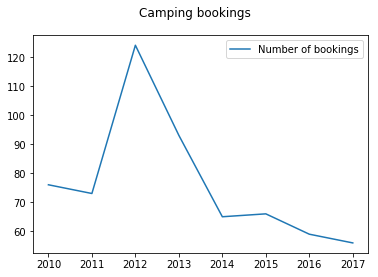

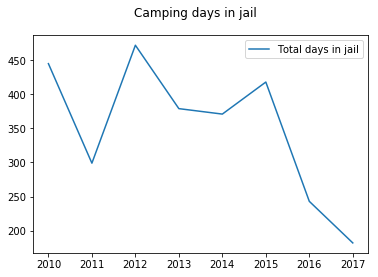

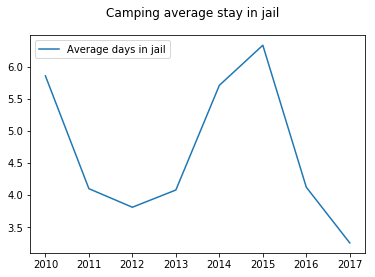

In [73]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.suptitle("Camping bookings")
plt.plot(camping_by_year.year, camping_by_year['count'], label='Number of bookings')
plt.legend(loc='best')
plt.show()

plt.suptitle("Camping days in jail")
plt.plot(camping_by_year.year, camping_by_year['sum'], label='Total days in jail')
plt.legend(loc='best')
plt.show()

plt.suptitle("Camping average stay in jail")
plt.plot(camping_by_year.year, camping_by_year['mean'], label='Average days in jail')
plt.legend(loc='best')
plt.show()

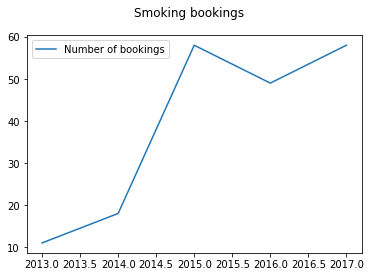

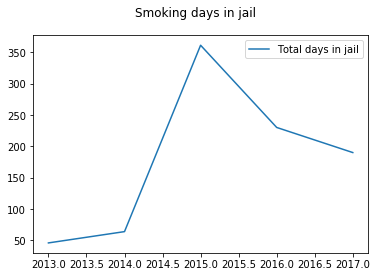

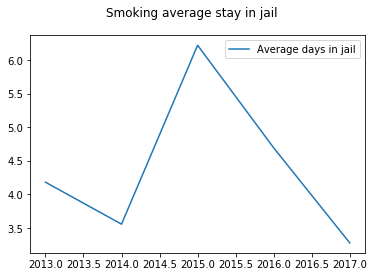

In [76]:
plt.suptitle("Smoking bookings")
plt.plot(smoking_by_year.year, smoking_by_year['count'], label='Number of bookings')
plt.legend(loc='best')
plt.show()

plt.suptitle("Smoking days in jail")
plt.plot(smoking_by_year.year, smoking_by_year['sum'], label='Total days in jail')
plt.legend(loc='best')
plt.show()

plt.suptitle("Smoking average stay in jail")
plt.plot(smoking_by_year.year, smoking_by_year['mean'], label='Average days in jail')
plt.legend(loc='best')
plt.show()


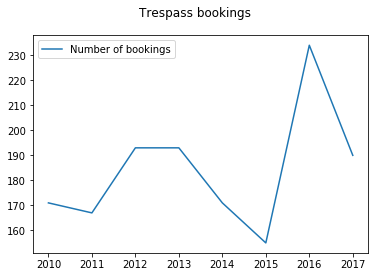

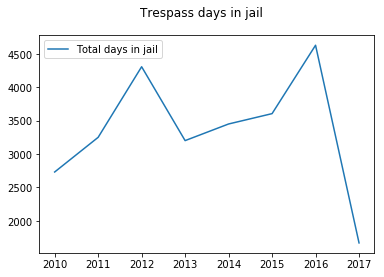

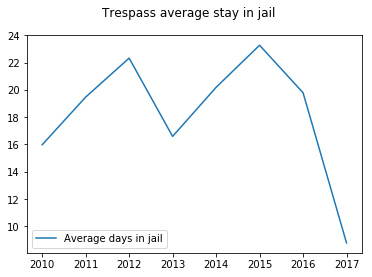

In [82]:
plt.suptitle("Trespass bookings")
plt.plot(trespass_by_year.year, trespass_by_year['count'], label='Number of bookings')
plt.legend(loc='best')
plt.show()

plt.suptitle("Trespass days in jail")
plt.plot(trespass_by_year.year, trespass_by_year['sum'], label='Total days in jail')
plt.legend(loc='best')
plt.show()

plt.suptitle("Trespass average stay in jail")
plt.plot(trespass_by_year.year, trespass_by_year['mean'], label='Average days in jail')
plt.legend(loc='best')
plt.show()


count    5299.000000
mean        2.060577
std         2.785985
min         1.000000
50%         1.000000
75%         2.000000
80%         2.000000
85%         3.000000
90%         4.000000
95%         6.000000
98%        10.000000
99%        14.000000
max        45.000000
Name: Subject Name, dtype: float64


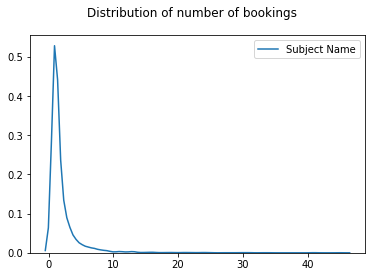

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


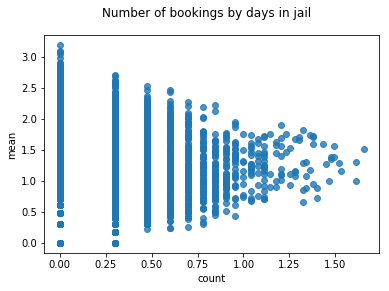

In [124]:
print(df['Subject Name'].value_counts().describe(percentiles=[0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99]))

plt.suptitle('Distribution of number of bookings')
sns.kdeplot(df['Subject Name'].value_counts())
plt.show()

plt.suptitle('Number of bookings by days in jail')
stays_by_person = df.groupby(['Subject Name']).agg({'Days in Facility': ['mean', 'count']})

import numpy as np

sns.regplot(np.log10(stays_by_person['Days in Facility']['count']), np.log10(stays_by_person['Days in Facility']['mean']))

In [148]:
plt.hist?

(array([    0.,     0.,   697.,     0.,  1547.,     0.,  1186.,     0.,
         1209.,     0.,   758.,     0.,   529.,     0.,   441.,     0.,
          256.,     0.,   273.,     0.,   173.,     0.,   168.,     0.,
          168.,     0.,   109.,     0.,    80.,     0.,   101.,     0.,
          117.,     0.,    51.,     0.,    64.,     0.,    62.,     0.,
           60.,     0.,    66.,     0.,   111.,     0.,    67.,     0.,
           83.,     0.,    70.,     0.,    67.,     0.,    66.,     0.,
           76.,     0.,    66.,     0.,    65.,     0.,    44.,     0.,
           31.,     0.,    59.,     0.,    43.,     0.,    39.,     0.,
           25.,     0.,    16.,     0.,    17.,     0.,    25.,     0.,
           17.,     0.,    22.,     0.,    40.,     0.,    65.,     0.,
           36.,     0.,    30.,     0.,    23.,     0.,    21.,     0.,
           19.,     0.,    21.,    24.]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,  

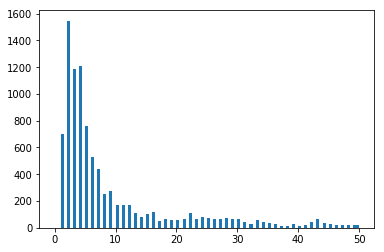

In [151]:
plt.hist(df[df['Days in Facility'] != 0]['Days in Facility'], bins=100, range=(0, 50))

In [83]:
df[df.ftp].to_csv('../data/boulder-failure-to-pay.csv', index=False)

In [90]:
df_bookings = pd.read_csv('../data/all-bookings-with-antihomeless-charges.csv')

In [95]:
pd.set_option('display.max_columns', 70)
pd.merge(df, df_bookings, left_on='Booking Number', right_on='Booking No')['Booking Number'].nunique()

9958

In [98]:
df['Booking Number'].nunique()

10919

In [165]:
merged = pd.merge(df, df_bookings, left_on='Booking Number', right_on='Booking No')
single_charge_camping = merged.groupby('Booking Number')['year', 'camping_x', 'Days in Facility'].first()[merged.groupby('Booking Number')['Subject Name'].count() == 1]

single_charge_camping[single_charge_camping.camping_x]['Days in Facility'].mean()

3.3096774193548386